# <center>**Análise de propriedades mecânicas do aço**<center>

<center><img src= "https://apaixonadosporhistoria.com.br/img/artigocapa/artigocapa_20201003032220_198345247.jpg"><center>


## **Ilum - Escola de Ciência**
**Professor responsável:**  
Daniel Cassar

**Alunos:** Anelise Gonçalves Silva,  
João Pedro da Silva Mariano,  
Pedro Henrique Kramer Canhim,  
Laís Fernanda Medeiros Ruela

# Introdução

## Ciência dos Materiais

A **Ciência dos Materiais** é normalmente dividida em **4 categorias** de objetos de estudo: metais, polímeros, cerâmicas e compósitos. Compreender os diferentes tipos de materiais, suas propriedades e como utilizá-los é uma parte crucial dessa Ciência e seus estudos têm aplicações em diversas áreas da sociedade, como na Engenharia dos Materiais. Neste Notebook, exploraremos a categoria dos **metais**, em específico a **liga metálica de Aço**. O nosso objetivo é olhar para um dataset de diferentes ligas metálicas de aço e com um tratamentos de dados e aplicação de **Machine Learning** achar um bom modelo de previsão de **Resistência à Tração Máxima (Tensile Strength)**. Então, buscando correlações entre os **elementos químicos** por modelos computacionais, iremos entender melhor como encontrar bons parâmetros para prever essa propriedade física.

## O Aço e a Resistência à Tração Máxima

O **Aço** é um metal composto majoritariamente por Ferro. Em sua estrutura química temos o que chamamos de células unitárias, que é como as ligações metálicas se comportam a nível atômico. As estruturas de aço geralmente se encontram em células unitárias cúbicas de face centrada (CCF) ou cúbicas de corpo centrado (CCC), dependendo da fase do material (como representado nas figuras a seguir) e os átomos de outros elementos químicos adicionados à liga ocupam os epaços interatômicos do ferro, podendo influênciar as na rede cristalina e, por consequência, mudar as propriedades físicas.

<center><img src= "https://wisc.pb.unizin.org/app/uploads/sites/557/2020/10/CNX_Chem_10_06_BdyCntrdCb.jpg"><center>
    
<center><img src= "https://wisc.pb.unizin.org/app/uploads/sites/126/2017/08/CNX_Chem_10_06_FcCntrdCbc.jpg"><center>

A partir da rede cristalina formada por células unitárias, forma-se grãos, que são um aspecto importante para entender as propriedades mecânicas do material. Os grãos são regiões individuais dentro do metal, cada uma com sua própria orientação cristalina (como mostra na figura a seguir). Cada grão consiste em átomos ou cristais que estão alinhados em uma orientação específica. Pode-se entender que o crescimento dos grãos ocorre durante o processo de solidificação do metal a partir do estado líquido para o sólido, por nucleações.
    
<center><img src= "https://static1.olympus-ims.com/data/Image/appnotes/GrainSizeAnalysis_AppNote_img1.jpg?rev=37C7"><center>

**Resistência à Tração Máxima (Tensile Strength)** é uma propriedade mecânica que mostra a capacidade de um material resistir a forças de tração ou estresse, sendo uma medida crítica para entender como um material se comporta quando submetido à tensão mecânica, como aquelas experimentadas em uma aplicação de alongamento, puxão ou tração. Essa propriedade física é medida em pressão, geralmente "Pa"(SI) ou "MPa" (Neste notebook as métricas e resultados estarão em "MPa") a fórmula é dada por: 

<center>$ \mathrm{Tensile \ Strength} = \frac{\text{Força Máxima de Tração}}{\text{Área da Seção Transversal Original}}$<center>


# Tratamento de dados

## Observações

* A semente utilizada neste notebook é: **57331** = STEEL :)

In [122]:
SEMENTE_ALEATORIA = 57331

## Importações

Impotamos e instalamos o necessário.

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
import math
from sklearn import tree
from itertools import product
try:
    import optuna
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install optuna
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from optuna import create_study, Trial
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## Dataframe

Nosso dataset é uma tabela impotada que tem as **fórmulas percentuais químicas** de cada elemento da liga, os **percentuais individuais de cada elemento** adicionado na liga e por fima as **propriedades físicas**, sendo essas o limite de elasticidade, a resistência máxima à tração e o alongamento. Neste dataset, há 312 ligas diferentes.

In [124]:
steel_df = pd.read_csv('steel_strength.csv')
steel_df

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1722.5,1998.1,5.0
308,Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0,1019.0,19.0
309,Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,1860.3,2156.6,3.0
310,Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,1812.1,2087.7,2.0


## Dataframe com Target

Primeira coisa que fizemos foi criar um dataframe com o que queríamos, **atributos** sendo os **percentuais dos elementos químicos** e o **target** sendo a **tensão à tração**.

In [125]:
steel_df = steel_df.drop('formula', axis=1)
steel_df_elements = steel_df.drop('yield strength', axis=1).drop('elongation', axis=1)
steel_df_elements

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,tensile strength
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2473.5
1,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1929.2
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1871.8
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2514.9
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1998.1
308,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0
309,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,2156.6
310,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,2087.7


## Elementos Químicos no Dataframe

Aqui estamos conferindo o quão presente cada elemento está em cada liga

In [126]:
for collumn in steel_df_elements:
    conj = 0
    for value in steel_df_elements[collumn]:
        if value != 0:
            conj = conj+1
    print(collumn)
    print(conj)

c
286
mn
312
si
312
cr
312
ni
312
mo
312
v
310
n
43
nb
310
co
312
w
16
al
312
ti
195
tensile strength
312


## Consertando Dataframe

Iremos retirar todas os exemplos que contém **tungstênio (W)**, uma vez que este está presente em menos de 10% do total de ligas. Ao remover os únicos que o contém, podemos remover este atributo pois terá nenhuma variância.

In [127]:
#Retirando as linhas que contém tungstênio (w)
steel_df_elements = steel_df_elements[steel_df_elements["w"] == 0]

#Retirando a coluna "w"
steel_df_elements = steel_df_elements.drop("w", axis = 1)

Removemos o tungstênio pois ele é pouco representativo, isto é, não temos dados suficiente para entender seu real impacto em propriedade mecênicas numa liga. Sendo assim, nos retornaria valores não tão precisos.

Sabendo que qualquer coisa é composta por 100% de elementos, o ferro é uma informação subentendida, já que, poderíamos somar todas porcentagens e o que falta seria o próprio ferro. Decidimos adicioná-lo, uma vez que seu valor não é presente em no dataset original. A importãncia de saber o valor de ferro é que ele carrega informação que vai influenciar os modelos.

In [128]:
#Adicionando Ferro

elementos = ["c", "mn", "si", "cr", "ni", "mo", "v", "n", "nb", "co", "al", "ti"]
fe = 100 - steel_df_elements[elementos].sum(axis = 1)
steel_df_elements["fe"] = fe
steel_df_elements

,c,mn,si,cr,ni,mo,v,n,nb,co,al,ti,tensile strength,fe
0,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.0,0.01,15.00,0.15,1.55,2473.5,60.50
2,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.0,0.01,13.90,0.39,0.57,1871.8,62.16
3,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.0,0.01,15.00,0.13,1.47,2514.9,61.61
4,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.0,0.01,14.90,0.13,1.55,2315.0,62.43
5,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.0,0.01,20.10,0.03,0.00,1779.5,63.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.0,0.01,4.90,0.03,0.00,1998.1,82.48
308,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.0,0.01,0.01,0.03,0.09,1019.0,81.19
309,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.0,0.91,4.88,0.03,0.00,2156.6,81.53
310,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.0,0.01,0.02,0.03,0.00,2087.7,85.57


## Matriz de correlação

Vermos a matriz de correlação entre a presença de cada elemento com a resistência máxima a tração, a fim de, posteriormente, encontrar padrões que se confirmem com a literatura de ligas metálicas e com o valor SHAP do melhor modelo.

Para esse caso e apenas transformaremos os 0 em NaN, já que para realizar correlação, ele entenderá que tal material não intervirá na correlação.

In [129]:
#Transformando NaN em 0
steel_df_elements_c = steel_df_elements
logic = steel_df_elements_c == 0
steel_df_elements_c[logic] = pd.NA

In [130]:
#Verificando a correlação dos materiais e Resistência à Tração Máxima
matrix_corr = steel_df_elements.corr()
matrix_corr = matrix_corr.loc['tensile strength']
matrix_corr = matrix_corr.drop('tensile strength')
matrix_corr

c     0.511959
mn   -0.133050
si   -0.065820
cr   -0.084501
ni   -0.196044
mo    0.226035
v     0.241458
n     0.206366
nb    0.051821
co    0.548990
al   -0.282354
ti    0.522849
fe   -0.431344
Name: tensile strength, dtype: float64

# Modelos

### Dataframe Original

Anteriormente, para perceber a correlação dos elementos químicos, por matriz de correlação, foi submetido uma transformação dos **zeros** do dataframe por elementos **NaN**. Então, voltamos ao dataframe original, substituindo o **pd.NA** por **0 (zeros)**.

In [131]:
logic_2 = steel_df_elements == pd.NA
steel_df_elements[logic] = 0

## K-nn

O regressor K-NN é um modelo de que baseia-se na posição e distância dos seus dados no hiperplano. Isto é, é uma maneira de chegar num valor do target para o input do usuário ao ver os targets dos vizinhos mais próximos. 

### Treino e teste

Para o funcionamento do modelo, deve-se separar em **Treino** e **Teste** uma quantidade de dados do dataframe. Usando o **train_test_split** do **Sklearn**, e um tamanho de teste de 10% (logo, um tamanho de treino de 90%), temos a segunte separação de dados para treinar nosso modelo, e posteriormente, sem utilizar os dados do treino, testá-lo.

In [132]:
FEATURES = ["c", "mn", "si", "cr", "mo", "v", "n", "nb", "co", "al", "ti", "fe"]
TARGET = ["tensile strength"]

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 57331

indices = steel_df_elements.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = steel_df_elements.loc[indices_treino]
df_teste = steel_df_elements.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

### Teste do modelo com hiperparâmetro fixo

De início, testaremos o modelo K-NN com hiperparâmetro fixo qualquer. Somente para analisar a performance do modelo, e mais para frente, otimizaremos. 

In [133]:
n_vizinhos = 7

modelo_knn = Pipeline([
    ('scaler', StandardScaler()),   # Normalização padrão
    ('knn', KNeighborsRegressor(n_neighbors=n_vizinhos)),  # Modelo KNN
])

modelo_knn.fit(X_treino, y_treino)
y_prev_kNN = modelo_knn.predict(X_teste)
rmse_kNN = np.sqrt(mean_squared_error(y_teste, y_prev_kNN))
print(rmse_kNN)

112.49131591577449


### Otimizando hiperparâmetros com Optuna

O Optuna é uma biblioteca de otimização do processo de encontrar os melhores hiperparâmetros, que com apenas a indicação dos possíveis valores de cada hiperparâmetro ela irá, através de x tentativas definidas pelo usuário, encontrar os melhores por um algoritmo de minimização do RMSE.

Os hiperparâmetros e seus respectivos ranges para o K-NN foram: **nº de vizinhos (1 - 200)** e **métrica ("cityblock", "cosine", "euclidean","l1", "l2", "minkowski", "manhattan", "nan_euclidean")**.

In [134]:
def cria_instancia_modelo_knn(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.
    """

    parametros = {
        "n_neighbors": trial.suggest_int("n_neighbors", 1, 200),
        
        "metric": trial.suggest_categorical("metric",["cityblock", "cosine", "euclidean",
                                                      "l1", "l2", "minkowski", "manhattan",
                                                      "nan_euclidean"]),
        "n_jobs": -1,

    }

    model = KNeighborsRegressor(**parametros)

    return model

In [135]:
NUM_FOLDS = 10
NUM_TENTATIVAS = 1000

def funcao_objetivo_knn(
    trial,
    X,
    y,
    num_folds=NUM_FOLDS,
):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451
    """

    modelo = cria_instancia_modelo_knn(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=NUM_FOLDS,
    )

    return -metricas.mean() # Menos pois a métrica sai com sinal negativo

In [136]:
def funcao_objetivo_parcial_knn(trial):
    return funcao_objetivo_knn(trial, X_treino, y_treino)

In [137]:
objeto_de_estudo = create_study(direction="minimize")
objeto_de_estudo.optimize(funcao_objetivo_parcial_knn, n_trials=NUM_TENTATIVAS)

[I 2023-11-15 23:02:20,422] A new study created in memory with name: no-name-c6a7e511-2d30-4704-a292-bdbbaf09bd20
[I 2023-11-15 23:02:37,976] Trial 0 finished with value: 270.2627355619779 and parameters: {'n_neighbors': 32, 'metric': 'euclidean'}. Best is trial 0 with value: 270.2627355619779.
[I 2023-11-15 23:02:38,109] Trial 1 finished with value: 323.1927423028177 and parameters: {'n_neighbors': 178, 'metric': 'euclidean'}. Best is trial 0 with value: 270.2627355619779.
[I 2023-11-15 23:02:38,197] Trial 2 finished with value: 328.47468125876446 and parameters: {'n_neighbors': 170, 'metric': 'l1'}. Best is trial 0 with value: 270.2627355619779.
[I 2023-11-15 23:02:38,550] Trial 3 finished with value: 307.0288629193497 and parameters: {'n_neighbors': 64, 'metric': 'nan_euclidean'}. Best is trial 0 with value: 270.2627355619779.
[I 2023-11-15 23:02:38,817] Trial 4 finished with value: 183.50891581870994 and parameters: {'n_neighbors': 11, 'metric': 'manhattan'}. Best is trial 4 with v

### Modelo com melhores hiperparâmetros

Agora, irémos resgatar o melhor tentativa que o optuna nos retornou para ver como se comportaria em um modelo sem validação cruzada.

In [138]:
melhor_trial_knn = objeto_de_estudo.best_trial

print(f"Número da melhor tentativa: {melhor_trial_knn.number}")
print(f"Parâmetros da melhor tentativa: {melhor_trial_knn.params}")

Número da melhor tentativa: 13
Parâmetros da melhor tentativa: {'n_neighbors': 4, 'metric': 'manhattan'}


In [139]:
modelo = cria_instancia_modelo_knn(melhor_trial_knn)
modelo.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(RMSE)

98.04705396730014


## Árvore

### Dataframe Original

Anteriormente, para perceber a correlação dos elementos químicos, por matriz de correlação, foi submetido uma transformação dos **zeros** do dataframe por elementos **NaN**. Então, voltamos ao dataframe original, substituindo o **pd.NA** por **0 (zeros)**.

In [140]:
logic_2 = steel_df_elements == pd.NA
steel_df_elements[logic] = 0

### Árvore de decisão

Um modelo muito bom para a análise deste dataset é a Árvore de Regressão. O funcionamento deste modelo é feito por um conjunto de deciões de **True** ou **False** baseado em como cada dado influencia na separação de um ramo desta árvore. Grafos, regressão Linear e Recursão, são assuntos que envolvem o funcionamento da Árvore de Regressão.

#### Treino e Teste

In [141]:
from sklearn.model_selection import train_test_split

FEATURES = ["c", "mn", "si", "cr", "mo", "v", "n", "nb", "co", "al", "ti", "fe"]
TARGET = ["tensile strength"]

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 57331

indices = steel_df_elements.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = steel_df_elements.loc[indices_treino]
df_teste = steel_df_elements.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

#### Instância da Árvore

Então, vamos crias a instância do modelo com o **DecisionTreeRegressor**, visto que, nossos dados são numéricos - queremos encontrar, a partir de quantidade de elementos químicos do aço o melhor modelo para o valor da Resistência à Tração Máxima!

In [142]:
from sklearn.tree import DecisionTreeRegressor

modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

#### Treino e Performance da Árvore

Treinando o modelo e testando sua performance, conseguimos obter o RMSE - métrica utilizada para dar precisão à modelos de regressão, além de fornecer a dispersão dos dados na unidade da medida.

In [143]:
import sklearn
from sklearn.metrics import mean_squared_error

modelo_dt.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {round(RMSE,2)}.")

O RMSE do modelo árvore de decisão foi de 113.02.


#### Observando a Árvore de Decisão

Aqui plotamos a representação visual da arvore de decição, junto com a representação em texto. Pode-se perceber o quão complexo é este modelo, observando o plot.

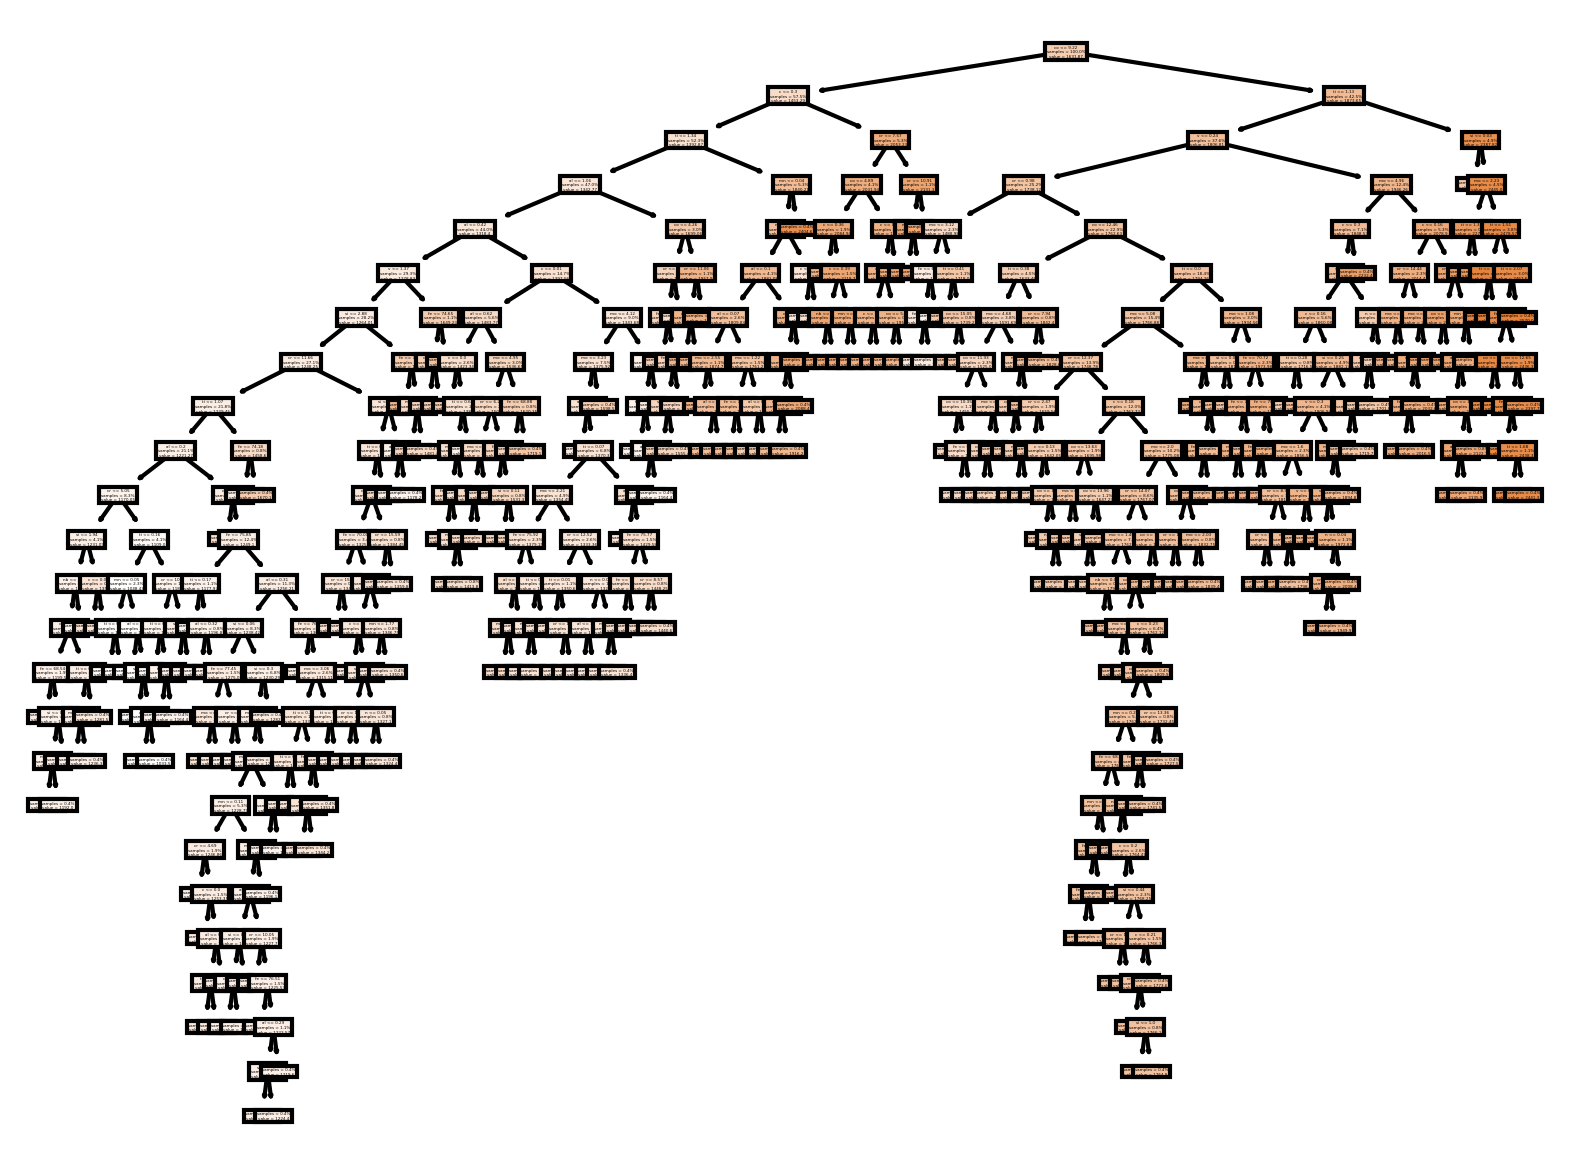

In [144]:
modelo_dt.fit(X_treino, y_treino)
figura, eixo = plt.subplots(dpi=300)
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)
plt.show()

In [145]:
from sklearn.tree import export_text

texto_dt = export_text(
    modelo_dt,
    feature_names=FEATURES,
    decimals=2,
)

print(texto_dt)

|--- co <= 9.22
|   |--- c <= 0.30
|   |   |--- ti <= 1.34
|   |   |   |--- al <= 1.06
|   |   |   |   |--- al <= 0.42
|   |   |   |   |   |--- v <= 1.37
|   |   |   |   |   |   |--- si <= 2.88
|   |   |   |   |   |   |   |--- cr <= 11.66
|   |   |   |   |   |   |   |   |--- ti <= 1.07
|   |   |   |   |   |   |   |   |   |--- al <= 0.20
|   |   |   |   |   |   |   |   |   |   |--- cr <= 5.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- cr >  5.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- al >  0.20
|   |   |   |   |   |   |   |   |   |   |--- cr <= 2.29
|   |   |   |   |   |   |   |   |   |   |   |--- value: [1429.70]
|   |   |   |   |   |   |   |   |   |   |--- cr >  2.29
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |--- ti >  1.07
|   |   |   |   |   |   |   |   |   |--

#### Hiperparâmetros da Árvore

Dois hiperparâmetros de uma Árvore são o **Número de Folhas** e a **Profundidade**, então, alterando em escala de **None, 2 até 10 e potências de 2 - de 16 até 1024 -** (Padrão escolhido pelo grupo), criamos três listas com os **index** alinhados. Uma lista com os **RMSEs**, outra com o **Nº de Folhas** Utilizadas e outra com o **Nº de profundidade** utilizado.

In [146]:
from itertools import product

NUM_FOLHAS = [None,2,3,4,5,6,7,8,9,10,16,32,64,128,256,512,1024]
NUM_PROFUNDIDADE = [None,2,3,4,5,6,7,8,9,10,16,32,64,128,256,512,1024]
n_de_rmses_ = []
n_folhas_ = []
n_profundidade_ = []
for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    n_de_rmses_.append(RMSE)
    n_folhas_.append(n_folhas)
    n_profundidade_.append(n_profundidade)

Para vizualizar melhor a distribuição dos RMSEs, plotamos um histograma.

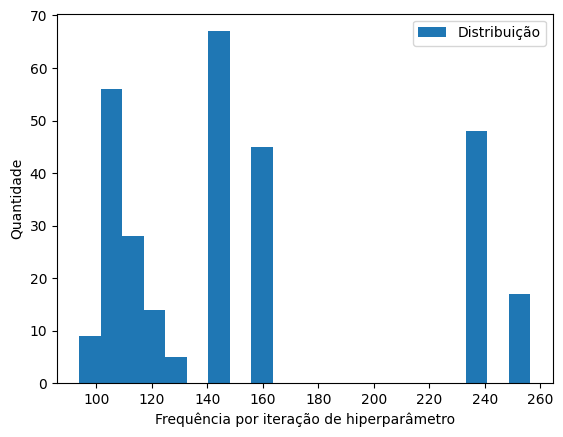

In [147]:
figura, eixo = plt.subplots()
num_caixas = 21
eixo.hist(n_de_rmses_, bins=num_caixas, label="Distribuição")
eixo.set_xlabel("Frequência por iteração de hiperparâmetro")
eixo.set_ylabel("Quantidade")
eixo.legend()

Para identificarmos a melhor Árvore com cada hiperparâmetro, pegamos o menor RMSE e vimos o índice do Nº de folhas e Nº de profundidade.

In [148]:
valor_min = min(n_de_rmses_)
print(round(valor_min,2))

93.94


In [149]:
indice_do_min = n_de_rmses_.index(min(n_de_rmses_))
indice_do_min 

8

In [150]:
print(f"A configuração da árvore que tem menor RMSE é de {n_profundidade_[indice_do_min]} folhas e {n_folhas_[indice_do_min]} de profundidade, com RMSE de {round(valor_min,2)}")

A configuração da árvore que tem menor RMSE é de 9 folhas e None de profundidade, com RMSE de 93.94


Por fim, plotamos o melhor modelo de Árvore, com os melhores hiperparâmetros, logo, com menor métrica RMSE.

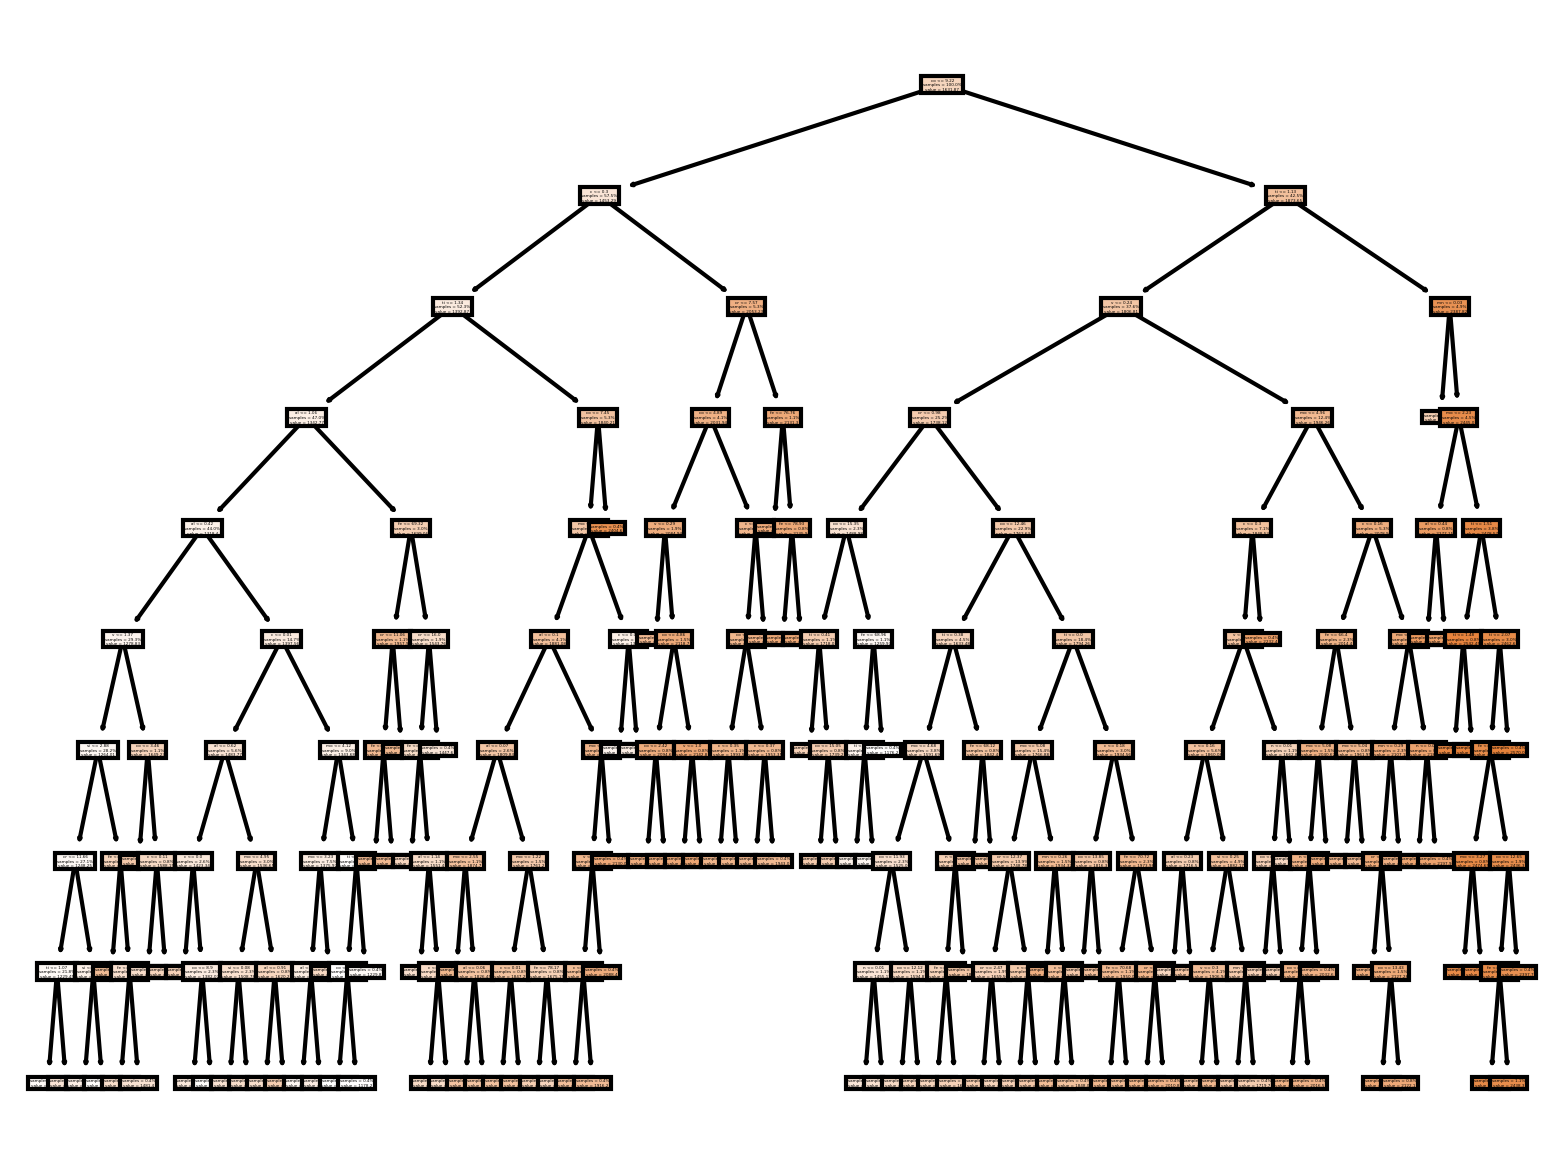

In [151]:
parametros = {
    'max_depth': n_profundidade_[indice_do_min],
    'max_leaf_nodes': n_folhas_[indice_do_min]
}

modelo_dt_1 = DecisionTreeRegressor(max_depth=parametros['max_depth'], max_leaf_nodes=parametros['max_leaf_nodes'], random_state=SEMENTE_ALEATORIA)

modelo_dt_1.fit(X_treino, y_treino)

figura, eixo = plt.subplots(dpi=300)
tree.plot_tree(
    modelo_dt_1,
    feature_names=FEATURES,
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)
plt.show()

#### Validação cruzada k-fold

A busca por grade por melhores hiperparâmetros é uma opção válida para encontrar um melor modelo que tenha baixa métrica, ou seja, menor RMSE. No entanto, a validação cruzada por k-fold é o ideal para obter-se uma métrica baseada num método mais robusto, visto que o a porções de treino e teste mudam baseadas no **Nº de folds** escolhidas. Então, escolhendo o número padrão de **10 folds**, temos os seguintes resultados:

In [152]:
X = steel_df_elements.reindex(FEATURES, axis=1).values
y = steel_df_elements.reindex(TARGET, axis=1).values.ravel()

NUM_FOLDS = 10

modelo_dt = DecisionTreeRegressor(max_depth=None, max_leaf_nodes=9, random_state=SEMENTE_ALEATORIA)

metricas = cross_val_score(
    modelo_dt,
    X,
    y,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
)

print("As métricas foram: ", metricas)
print()
print("A média das métricas é de: ", metricas.mean())
print("A média das métricas é de: ", abs(metricas.mean()))

As métricas foram:  [-385.76447554 -293.25595627 -216.22688891 -223.90855873 -210.06257867
 -232.37209435 -110.90322399 -176.51728716 -164.32418995 -185.10140094]

A média das métricas é de:  -219.8436654495691
A média das métricas é de:  219.8436654495691


Para entender melhor a validação, fizemos o número de folds varias de **2** a **20** e colocamos em uma lista.

In [153]:
def testar_num_folds(X, y, max_folds=98):
    resultados = []

    for num_folds in range(2, max_folds + 1):
        modelo_dt = DecisionTreeRegressor(max_depth=None, max_leaf_nodes=9, random_state=SEMENTE_ALEATORIA)
        metricas = cross_val_score(
            modelo_dt,
            X,
            y,
            cv=num_folds,
            scoring="neg_root_mean_squared_error",
        )
        media_metricas = abs(metricas.mean())
        resultados.append((num_folds, media_metricas))

    return resultados

resultados = testar_num_folds(X, y, max_folds=98)

for num_folds, media_metricas in resultados:
    print(f"Num Folds: {num_folds}, Média Métricas: {media_metricas}")

Num Folds: 2, Média Métricas: 353.40344660278595
Num Folds: 3, Média Métricas: 295.13209757663606
Num Folds: 4, Média Métricas: 287.00252145340494
Num Folds: 5, Média Métricas: 217.37983083221016
Num Folds: 6, Média Métricas: 233.01215894016198
Num Folds: 7, Média Métricas: 232.7144063882286
Num Folds: 8, Média Métricas: 229.12767579676995
Num Folds: 9, Média Métricas: 225.7346453863472
Num Folds: 10, Média Métricas: 219.8436654495691
Num Folds: 11, Média Métricas: 192.2113415525314
Num Folds: 12, Média Métricas: 205.73872493788394
Num Folds: 13, Média Métricas: 198.58091021310213
Num Folds: 14, Média Métricas: 215.10246315823665
Num Folds: 15, Média Métricas: 199.28283850665096
Num Folds: 16, Média Métricas: 198.282770156445
Num Folds: 17, Média Métricas: 202.34331191565406
Num Folds: 18, Média Métricas: 206.1162942547095
Num Folds: 19, Média Métricas: 219.5262566582406
Num Folds: 20, Média Métricas: 205.2146399016723
Num Folds: 21, Média Métricas: 218.04418725763614
Num Folds: 22, Mé

In [154]:
segundos_termos = []

for tupla in resultados:
    segundo_termo = tupla[1]
    segundos_termos.append(segundo_termo)

print(segundos_termos)

[353.40344660278595, 295.13209757663606, 287.00252145340494, 217.37983083221016, 233.01215894016198, 232.7144063882286, 229.12767579676995, 225.7346453863472, 219.8436654495691, 192.2113415525314, 205.73872493788394, 198.58091021310213, 215.10246315823665, 199.28283850665096, 198.282770156445, 202.34331191565406, 206.1162942547095, 219.5262566582406, 205.2146399016723, 218.04418725763614, 213.25367116552906, 199.02742351218737, 199.29451342736274, 202.4228198125163, 199.90486244926265, 202.38569154799396, 200.8141067334684, 200.65513746483128, 201.7207808097227, 201.4024564197558, 201.00551411123058, 193.37496458673272, 192.08934847280088, 194.56374648448676, 198.51944755294335, 198.70288866404377, 196.24189933164075, 195.60195667951874, 195.85562268269322, 194.5060119873405, 198.18047098340784, 196.16569589147858, 195.57326866672804, 193.2776558942405, 195.45411475895438, 196.19269082176982, 197.4861629889831, 199.2214799810103, 195.0506665538607, 193.61302092057974, 193.6895408434881

Aqui identificamos o menor RMSE e plotamos um gráfico

In [155]:
n_de_folds = [2, 3, 4, 5, 6, 7, 8, 9,
              10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
              20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
              30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
              40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
              50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
              60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
              70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
              80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
              90, 91, 92, 93, 94, 95, 96, 97, 98]
print(min(segundos_termos))

185.82625321613165


Text(0.5, 1.0, 'Validação k-fold')

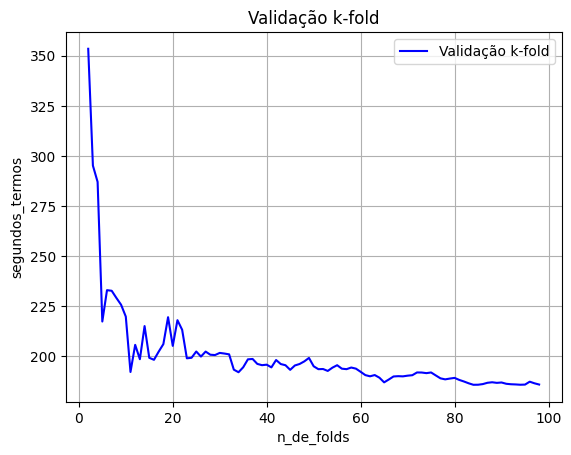

In [156]:
plt.plot(n_de_folds, segundos_termos, label='Validação k-fold', color='blue')
plt.legend()
plt.ylabel('segundos_termos')
plt.xlabel('n_de_folds')
plt.grid()
plt.title('Validação k-fold')

Percebe-se que o melhor valor da validação ainda é maior que o da busca em grade, porém, este método é mais robusto, visto que há variação dos grupos treino e teste. Além disso, com o plot do gráfico, percebemos que a região de 2-5 folds tem alto RMSE, vito que o modelo não treina bem com poucas folds. Contudo, quando nos aproximamos de k = 100 temos, basicamente um overfitting, onde são tantas folds que o modelo treina com quase todos os dados e testa em poucos. Então, percebendo que uma boa faixa de folds é entre 5-20, vamor repetir o processo.

Num Folds: 2, Média Métricas: 353.40344660278595
Num Folds: 3, Média Métricas: 295.13209757663606
Num Folds: 4, Média Métricas: 287.00252145340494
Num Folds: 5, Média Métricas: 217.37983083221016
Num Folds: 6, Média Métricas: 233.01215894016198
Num Folds: 7, Média Métricas: 232.7144063882286
Num Folds: 8, Média Métricas: 229.12767579676995
Num Folds: 9, Média Métricas: 225.7346453863472
Num Folds: 10, Média Métricas: 219.8436654495691
Num Folds: 11, Média Métricas: 192.2113415525314
Num Folds: 12, Média Métricas: 205.73872493788394
Num Folds: 13, Média Métricas: 198.58091021310213
Num Folds: 14, Média Métricas: 215.10246315823665
Num Folds: 15, Média Métricas: 199.28283850665096
Num Folds: 16, Média Métricas: 198.282770156445
Num Folds: 17, Média Métricas: 202.34331191565406
Num Folds: 18, Média Métricas: 206.1162942547095
Num Folds: 19, Média Métricas: 219.5262566582406
Num Folds: 20, Média Métricas: 205.2146399016723


Text(0.5, 1.0, 'Validação k-fold')

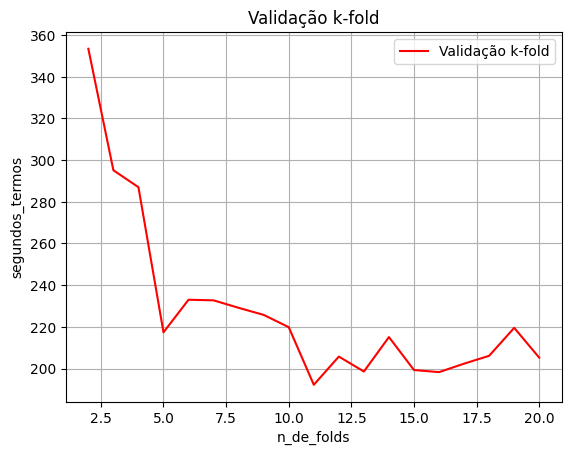

In [157]:
def testar_num_folds_1(X, y, max_folds=20):
    resultados_1 = []

    for num_folds in range(5, max_folds + 1):
        modelo_dt = DecisionTreeRegressor()
        metricas = cross_val_score(
            modelo_dt,
            X,
            y,
            cv=num_folds,
            scoring="neg_root_mean_squared_error",
        )
        media_metricas = abs(metricas.mean())
        resultados_1.append((num_folds, media_metricas))

    return resultados_1

resultados_1 = testar_num_folds(X, y, max_folds=20)

for num_folds, media_metricas in resultados_1:
    print(f"Num Folds: {num_folds}, Média Métricas: {media_metricas}")
    
segundos_termos_1 = []

for tupla in resultados_1:
    segundo_termo = tupla[1]
    segundos_termos_1.append(segundo_termo)

n_de_folds_1 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

#Printando o menor RMSE de 2 a 20 folds e pllotando o gráfico

plt.plot(n_de_folds_1, segundos_termos_1, label='Validação k-fold', color='red')
plt.legend()
plt.ylabel('segundos_termos')
plt.xlabel('n_de_folds')
plt.grid()
plt.title('Validação k-fold')

Repetindo o processo, percebemos que o menor valor se encontra nessa faixa (5-20) e o valor mínimo de RMSE por validação cruzada k-fold é:

In [158]:
print(min(segundos_termos_1))
print("O melhor Nº de fold foi:", n_de_folds_1[segundos_termos_1.index(min(segundos_termos_1))])


192.2113415525314
O melhor Nº de fold foi: 11


Como modelo principal, iremos usar a floresta, que é o conjunto de árvores. No entanto, não iremos usar só o método robusto de k-fold e nem só a busca em grade por hiperparâmetros, mas sim, o método de Optuna (umótimo conjunto de busca por hiperparâmetros), que será explicado posteriormente.

## Floresta aleatória

A floresta aleatória é uma abordagem que utiliza várias árvores de decisão para melhorar a precisão e a generalização do modelo. Ela funciona como um comitê (*ensemble*) contendo diversas árvores de decisão onde cada uma realiza sua previsão individual.

Este modelo introduz aleatoriedade no processo de treinamento, como a seleção aleatória de subamostras do conjunto de dados e de características para dividir em cada nó da árvore. Isso ajuda a reduzir o sobreajuste e aumentar a generalização do modelo, criando modelos mais robustos e menos suscetíveis ao **overfitting**.

Ele faz predições agregando as predições de todas as árvores na floresta. Geralmente, usa a média (no caso de regressão) ou a moda (no caso de classificação) das predições individuais. No caso dos nossos dados, como se tratam de atibutos numéricos, utilizaremos a regressão. Costuma ser mais robusto devido à média ou votação entre várias árvores, o que melhora o desempenho em conjuntos de dados diversos.

### Treino e teste

Assim como no modelo de "árvore de decisão", é necessário dividir os dados em treino e teste.

In [159]:
FEATURES = ["c", "mn", "si", "cr", "mo", "v", "n", "nb", "co", "al", "ti", "fe"]
TARGET = ["tensile strength"]

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 57331

indices = steel_df_elements.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = steel_df_elements.loc[indices_treino]
df_teste = steel_df_elements.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

### Instância da floresta

Vamos, agora, criar a instância do modelo com o **RandomForestRegressor**.

In [160]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

### Treino e performance da floresta

Da mesma forma como fizemos no modelo de "Árvore de Decisão", iremos treinar nosso modelo e então calcular a medida de erro "RMSE".

In [161]:
NUM_FOLDS = 10

modelo_dt = RandomForestRegressor()

metricas = cross_val_score(
    modelo_rf,
    X_treino,
    y_treino,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error", #Utilizamos o negativo da raiz quadrada do erro para se adaptar
                                           #às definições do scikit-learn
)

print("O RMSE de cada fold foi: ", abs(metricas)) #usamos o valor absoluto para retirarmos o sinal de negativo
print()
print("A média dos RMSEs é de: ", abs(metricas.mean()))
print("O desvio padrão é de: ", abs(metricas.std()))

O RMSE de cada fold foi:  [100.16695429 124.84889445 149.15929827 130.20272091 113.88701457
 162.82706839 133.46366341 188.428789   214.12968707 137.66018503]

A média dos RMSEs é de:  145.47742753829746
O desvio padrão é de:  32.84479323518307


Como pudemos observar utilizando a validação cruzada, o desvio padrão da métrica de erro foi muito alto, o que sugere possíveis outliers nos dados. Isso não impede a implementação de modelos utilizando esse dataset sem retirar os outliers, no entanto, esse possível problema pode reduzir a qualidade do modelo.

### Hiperparâmetros da Floresta

Para otimizar os hiperparâmetros da nossa floresta aleatória, utilizaremos a biblioteca optuna, que testa os conjuntos de hiperparâmetros que provavelmente fornecerão o melhor resultado.

Os hiperparâmetros analisados e os ranges de valores são diversos. Sendo eles **nº de estimadores (10-200)**, **critério ("squared_error", "friedman_mse", "poisson")**, **min_samples_split (2-20)**, **min_samples_leaf (1-20)** e **max_features(0-1)**



In [162]:
import pickle
from optuna import create_study, Trial

def cria_instancia_modelo(trial):
    """Cria uma instância do modelo.

    Args:
      trial: objeto tipo Trial do optuna.

    Returns:
      Uma instância do modelo desejado.
    """

    parametros = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 200),

        "criterion": trial.suggest_categorical("criterion", ["squared_error", "friedman_mse", "poisson"]),

        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20, log=True),

        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20, log=True),

        "max_features": trial.suggest_float("max_features_internal", 0, 1),

        "n_jobs": -1,

        "bootstrap": True,

        "random_state": SEMENTE_ALEATORIA,
    }

    model = RandomForestRegressor(**parametros)

    return model

In [163]:
NUM_FOLDS = 10
NUM_TENTATIVAS = 100

def funcao_objetivo(
    trial,
    X,
    y,
    num_folds=NUM_FOLDS,
):
    """Função objetivo do optuna

    Referencia:
      https://medium.com/@walter_sperat/ using-optuna-with-sklearn-the-right-way-part-1-6b4ad0ab2451
    """

    modelo = cria_instancia_modelo(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=NUM_FOLDS,
    )

    return -metricas.mean() # Menos pois a métrica sai com sinal negativo

In [164]:
def funcao_objetivo_parcial(trial):
    return funcao_objetivo(trial, X_treino, y_treino)

In [165]:
objeto_de_estudo = create_study(direction="minimize")
objeto_de_estudo.optimize(funcao_objetivo_parcial, n_trials=NUM_TENTATIVAS)

[I 2023-11-15 23:09:07,218] A new study created in memory with name: no-name-6c4a27c9-254a-44b8-9e35-ae5441f2a754
[I 2023-11-15 23:09:12,715] Trial 0 finished with value: 136.03313884092228 and parameters: {'n_estimators': 165, 'criterion': 'poisson', 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features_internal': 0.011447392421764735}. Best is trial 0 with value: 136.03313884092228.
[I 2023-11-15 23:09:14,458] Trial 1 finished with value: 187.7570921693062 and parameters: {'n_estimators': 52, 'criterion': 'squared_error', 'min_samples_split': 3, 'min_samples_leaf': 11, 'max_features_internal': 0.4342045339707935}. Best is trial 0 with value: 136.03313884092228.
[I 2023-11-15 23:09:17,580] Trial 2 finished with value: 159.40778099826034 and parameters: {'n_estimators': 103, 'criterion': 'friedman_mse', 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features_internal': 0.7836983975356824}. Best is trial 0 with value: 136.03313884092228.
[I 2023-11-15 23:09:18,892] Trial 3 f

## Criando um modelo com os melhores hiperparâmetros

In [166]:
melhor_trial = objeto_de_estudo.best_trial

print(f"Número da melhor tentativa: {melhor_trial.number}")
print(f"Parâmetros da melhor tentativa: {melhor_trial.params}")

Número da melhor tentativa: 98
Parâmetros da melhor tentativa: {'n_estimators': 138, 'criterion': 'poisson', 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features_internal': 0.4519057864312625}


In [167]:
modelo_rf = cria_instancia_modelo(melhor_trial)
modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(RMSE)

88.11223244611266


Finalmente, temos nosso modelo com os melhores hiperparâmetros encontrados, resultando em um RMSE relativamente baixo.

## SHAP

O SHAP é um valor que determina a importância de cada atributo para a definição do valor do target. Ele é calculado através da permutação dos valores de contribuição marginal média dos atributos. Ele serve para tentar compreender como um modelo caixa preta interpreta possíveis inputs e como define os resultados.

### Baixando SHAP

In [ ]:
pip install shap

### Aplicando SHAP

In [ ]:
import shap # Importando o SHAP

#cria um X para o shap que carrega a informação do nome de cada atributo
X_shap = steel_df_elements[["c", "mn", "si", "cr", "mo", "v", "n", "nb", "co", "al", "ti", "fe"]]

#Cria um explicador
explainer = shap.Explainer(modelo_rf)

#Aplicando o X de teste para evaluar valores
shap_values = explainer(X_shap)


## Plot de barra da média do módulo dos valores de SHAP

O SHAP calcula um parâmetro para cada exemplo, então ele faz o módulos desses valores e tira a média. A barra e o valor ao lado significa este processo - a média dos módulos do SHAP para cada atributo de cada exemplo. Com esses valores, observamos os elementos que tem melhor correlação em módulo.

In [ ]:
shap.plots.bar(shap_values)

## Plot beeswarm

Aqui, o plot dos parâmetros do SHAP não estão em módulo. Logo, podemos perceber a influência tanto positiva, quanto negativa, para o target. No **eixo x**, quanto mais à direita, maior o valor do parâmetro SHAP. Já no **eixo y**, à esquerda etão os atributos. O gradiente de cor indica a concentração dos atributos.

In [ ]:
shap.plots.beeswarm(shap_values)

Interpretando o gráfico para o crômo (Cr), percebemos que altas e baixas concentrações, pontos vermelhos e azuis respectivamente, tem valores de SHAP próximos a zero, ou seja, tem pouca importância para definir o target no modelo. 

Para o ferro (Fe), por exemplo, analizamos que altas concentrações (vermelho) tem valores de SHAP negativos, ou seja, aumentar o ferro na liga influencia negativamente na Resistência Máxima à Tração. Por consequência, baixas concentrações de ferro (azul) tem valores de SHAP positivos, ou seja, retirar percentuais de ferro influencia positivamente na Resistência Máxima à Tração.

O carbono é essencial para a liga de aço, diminuindo a oxidação e ajuda a comportar outros átomos na liga. A adição de carbono aumenta a Resistência Máxima à Tração, contudo, adicionar muito carbono deixa a liga quebradiça, por isso seu valores estão próximos de zero. De maneira contrária ao ferro, o carbono (C) em altas concentrações (vermelho) tem valores de SHAP positivos, ou seja, aumentar (levemente) o carbono na liga influencia positivamente na Resistência Máxima à Tração. Em contraste, baixas concentrações de carbono (azul) tem valores de SHAP negativos, ou seja, retirar percentuais de carbono influencia negativamente na Resistência Máxima à Tração.

Por fim, para o cobalto (Co), altas concentrações deste elemento (vermelho) tem valores de SHAP positivos, ou seja, aumentar o cobalto na liga de aço influencia positivamente na Resistência Máxima à Tração. E então, baixas concentrações de cobalto (azul) tem valores de SHAP negativos, ou seja, retirar percentuais de cobalto influencia negativamente na Resistência Máxima à Tração.

Vale ressaltar que o deslocamento e o isolamento dos pontos são fatores importantes na análise. No caso do ferro, os valores de alta concentração (vermelho) estão negativos e próximos ao zero, logo, ligas de ferro que diminuem seu percentual com adição de outros metais ajudam a aumentar a Resistência Máxima à Tração. Porém, por conta dessa proximidade com o valor zero de SHAP, não se pode retirar muito ferro, pois pode tornar a estrutura dos grãos da liga menos resistente, visto que ele é o elemento principal do aço.

O carbono influencia de forma contrária, como discutido anteriormente, pois, mesmo ajudando na Resistência Máxima à Tração, com um aumento excessivo de concentração deixa a estrutura dos grãos mais quebradiça, portanto, mais frágil e com menor Resistência Máxima à Tração.

Além disso, O isolamento dos pontos no caso do cromo indica uma ótima influência do aumento da concentração com o aumento da Resistência Máxima à Tração, por consequencia, indica ótima influência da diminuição da concentração com a diminuição da Resistência Máxima à Tração.

# Conclusão

Utilizando 3 modelos diferentes: K-NN, Árvore de Decisão e Floresta aleatória, obtivemos o seguinte relatório:

#### **K-NN:**

* **K-NN:** Nº_viz = 7, metric = euclidean; **o RMSE foi de 112,5**  
* **K-NN - Optuna:** Nº_viz = 4, metric = cityblock; **o RMSE foi de 98,0**  

Neste primeiro caso utilizamos direto a biblioteca Optuna para buscar o melhor modelo de K-NN e observamos que o Optuna foi eficaz. Vale ressaltar que para este modelo os dados foram normalizados por normalização padrão. Como visto no Notebook: "Modelos 4"(disciplina de Aprendizado de Máquina - Daniel Cassar, Ilum - Escola de Ciência), o modelo K-NN apresenta substancial melhora quando normalizado, pois se baseia em distâncias para determinar o valor do target, então, quando as distância estão em uma mesma faixa, há um balanceamento dos atributos.

#### **Árvore de Decisão:**

* **Árvore de Decisão:** **o RMSE foi de 113**  
* **Árvore Otimizada:** max_folha = 9, max_prof = None; **o RMSE foi de 93,9**  
* **Árvore - k-fold de 10:** max_folha = 9, max_prof = None, k-fold = 10; **o RMSE foi de 219,8**  
* **Árvore - k-fold de 11:** max_folha = 9, max_prof = None, k-fold = 11; **o RMSE foi de 192,2**  

No caso da Árvore de decisão, foram realizados mais estudos sobre otimização de modelo. A árvore otimizada deu o menor valor de RMSE, porém, o K-fold de 11 com a árvore otimizada foi o modelo mais robusto, ou seja, mesmo tendo um valor maior de RMSE, foi um método mais confiável.

#### **Floresta Aleatória:**

* **Floresta Aleatória:** **o RMSE foi de 145.5**, **desvio padrão = 32.8**  
* **Floresta - Optuna:** nºest = 5, criterio = friedman, min_sample = 3, min_leaf = 2, max_feat = 0.51; **o RMSE foi de 93.3**

Como a Floresta Aleatória é um modelo que contém várias Árvores de Decisão, isso a torna mais robusta e confiável. Isso se potencializa quando aplicamos a biblioteca Optuna. Então, ela foi escolhida como nosso modelo final com **RMSE de 93.3**.

Além disso, na Árvore de Decisão e Floresta Aleatória os dados não foram normalizados, visto que, em seus modelos, há separações por magnitude dos dados, não sendo influenciadas por normalização. Isso também foi comprovado no Notebook "Modelos 4"(disciplina de Aprendizado de Máquina - Daniel Cassar, Ilum - Escola de Ciência).

#### **Matriz de correlação e SHAP:**

Para a análise da influência dos atributos no nosso target, escolhemos os elementos químicos: Carbono, Cobalto, Titânio, Ferro e Cromo.

A matriz de correlação, como explicito no nome, faz uma matriz que mostra o valor de correlação dos compostos químicos com o target. 

##### **Matriz de correlação:**
* Cobalto - [0.55]  
* Titânio - [0.52]  
* Ferro -  [-0.43]  
* Cromo - [-0.08]  
* Carbono - [0.51]  

Segundo a matriz, Carbono, Cobalto e Titânio tem correlação positiva, então, o aumento desses elementos na liga aumentaria a Resistência Máxima à Tração. Como Ferro e Cromo tem correlação negativa, o aumento desses elementos na liga diminuiria a Resistência Máxima à Tração (No caso do Cromo, a correlação é menor em módulo, logo, a influência não seria tão significativa)

Então, utilizando a Floresta Aleatória como modelo final, foi feito o SHAP, que, sendo um método que mostra a importância dos atributos de modelos, ou seja, mostra como o modelo interpreta os dados, temos as seguintes **médias dos valores em módulo**:

##### **SHAP:**
* Cobalto - [128.3]  
* Titânio - [64.1] 
* Ferro -  [46.1]  
* Cromo - [16.1]   
* Carbono - [59.3] 

As médias dos valores SHAP em módulo, a dispersão dos pontos e os estudos sobre a ligas metálicas de aço nos dão uma clareza melhor de como os os elementos químicos adicionados ao ferro influenciam na Resistência Máxima à Tração. Comparando com a Matriz de Correlação, O Carbono, Cobalto e Titânio tem valores de SHAP que afirmam que o aumento da concentração desses metais aumenta a Resistência Máxima à Tração, no entando de formas diferentes. Todos os metais dentro da liga estão em um intervalo de porcentagem, portanto entender as flutuações de percentual nesses intervalos é muito importante. No caso do Cobalto, ele teve uma ótima influência no target, o Titânio teve influência intermediária e o Carbono baixa influência, visto que, se adicionado Carbono além do limite a liga fica quebradiça, influenciando no valor da Resistência Máxima à Tração. O caso do Ferro influencia inversamente a Resistência Máxima à Tração, porém, assim como no Carbono, os valores não podem ser muito discrepantes, pois mudariam muito a estrutura do aço. Além disso, o Cromo é um elemento que influencia pouco na Resistência Máxima à Tração, pois os valores de SHAP flutuam próximos ao zero.

Por fim, concluimos que para este dataset o melhor modelo foi a **Floresta Aleatória com Optuna** e o método **SHAP** foi bastante eficaz para entender a influência dos elementos químicos adicionados à liga em relação Resistência Máxima à Tração, quando comparado com a Literatura.

# Referências Bibliográficas

[1] https://figshare.com/articles/dataset/Steel_Strength_Data/7250453 (dataset)
 
[2] https://citrination.com/datasets/153092/show_files/ (informações do dataset)
 
[3] https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/#h-what-is-knn-k-nearest-neighbor-algorithm (K-nn)
 
[4] https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html (Pipeline)
 
[5] https://optuna.readthedocs.io/en/stable/ (Optuna)
 
[6] https://blog.somostera.com/data-science/arvores-de-decisao (Árvore)
 
[7] https://medium.com/big-data-blog/shap-o-que-%C3%A9-e-por-que-usar-6b01d37ae592 (SHAP)
 
[8] https://www.diehlsteel.com/technical-information/effects-of-common-alloying-elements-in-steel/#:~:text=Cobalt%20(CO),elements%20in%20more%20complex%20steels. (Embasamento teórico)
 
[9] https://www.scirp.org/pdf/JMMCE20121100008_97677514.pdf (Embasamento teórico)
 
[10] Módulos 5.1, 5.2, 6.1, e 11 da disciplina de Machine Learning utilizados na parte da Árvore de Decisão
 
[11] Módulos 5.2, 6.1, 6.2 e 11 da disciplina de Machine Learning utilizados na parte da Floresta Aleatória
 
[12] https://www.youtube.com/watch?v=WSRqJdT2COE (Embasamento teórico)
 
[13] https://www.youtube.com/watch?v=L8_sVRhBDLU&t=551s (SHAP)
 
[14] https://www.youtube.com/watch?v=PaGJwOPg2kU (Embasamento teórico)
 
[15] https://www.youtube.com/watch?v=BHZALtqAjeM (Embasamento teórico)
 
[16] https://www.olympus-ims.com/pt/applications/grain-size-analysis/ (Imagem)
 
[17] https://apaixonadosporhistoria.com.br/artigo/331/armas-e-armaduras-equivocos-comuns (Imagem)
 
[18] https://wisc.pb.unizin.org/minimisgenchem/chapter/types-of-unit-cells-body-centered-cubic-and-face-centered-cubic-m11q5/ (Imagem)

[19] Inteligencias atificiais de linguagem natural - ChatGPT e PerplexityAI - foram utilizadas para revisão ortográfica e de códigos.

[20] Atividade "Modelos 4" da dupla "Encantadores de Serpente" composto por Pedro Henrique Kramer Canhim e João Pedro da Silva Mariano